## Import des packages

On importe le package pandas et la fonction de JuL pour pouvoir utiliser du SQL facilement. Bravo Jules !

In [1]:
from fonctions_perso import sql_request
import pandas as pd

slt gro


## Etude de la table `tracking`

In [3]:
track100 = sql_request("SELECT * FROM tracking LIMIT 50;")
track100

time_sec ht  posx  posy      name_id  team_id   date_id   match_id
0        0.0  1   871   909  Player_0088  Team_02  Date_001  Match_001
1        0.1  1   861   909  Player_0088  Team_02  Date_001  Match_001
2        0.2  1   852   910  Player_0088  Team_02  Date_001  Match_001
3        0.3  1   842   911  Player_0088  Team_02  Date_001  Match_001
4        0.4  1   833   913  Player_0088  Team_02  Date_001  Match_001
5        0.5  1   823   916  Player_0088  Team_02  Date_001  Match_001
6        0.6  1   814   919  Player_0088  Team_02  Date_001  Match_001
7        0.7  1   805   922  Player_0088  Team_02  Date_001  Match_001
8        0.8  1   796   926  Player_0088  Team_02  Date_001  Match_001
9        0.9  1   787   930  Player_0088  Team_02  Date_001  Match_001
10       1.0  1   778   934  Player_0088  Team_02  Date_001  Match_001
11       1.1  1   769   938  Player_0088  Team_02  Date_001  Match_001
12       1.2  1   760   942  Player_0088  Team_02  Date_001  Match_001
13       1.3  1   751   947  Player_0088  Team_02  Date_001  Match_001
14       1.4  1   742   952  Player_0088  Team_02  Date_001  Match_001
15       1.5  1   733   956  Player_0088  Team_02  Date_001  Match_001
16       1.6  1   724   961  Player_0088  Team_02  Date_001  Match_001
17       1.7  1   715   966  Player_0088  Team_02  Date_001  Match_001
18       1.8  1   706   971  Player_0088  Team_02  Date_001  Match_001
19       1.9  1   697   975  Player_0088  Team_02  Date_001  Match_001
20       2.0  1   687   979  Player_0088  Team_02  Date_001  Match_001
21       2.1  1   678   982  Player_0088  Team_02  Date_001  Match_001
22       2.2  1   669   984  Player_0088  Team_02  Date_001  Match_001
23       2.3  1   659   984  Player_0088  Team_02  Date_001  Match_001
24       2.4  1   648   983  Player_0088  Team_02  Date_001  Match_001
25       2.5  1   638   979  Player_0088  Team_02  Date_001  Match_001
26       2.6  1   627   974  Player_0088  Team_02  Date_001  Match_001
27       2.7  1   616   965  Player_0088  Team_02  Date_001  Match_001
28       2.8  1   604   955  Player_0088  Team_02  Date_001  Match_001
29       2.9  1   592   942  Player_0088  Team_02  Date_001  Match_001
30       3.0  1   580   926  Player_0088  Team_02  Date_001  Match_001
31       3.1  1   568   908  Player_0088  Team_02  Date_001  Match_001
32       3.2  1   556   887  Player_0088  Team_02  Date_001  Match_001
33       3.3  1   543   865  Player_0088  Team_02  Date_001  Match_001
34       3.4  1   531   841  Player_0088  Team_02  Date_001  Match_001
35       3.5  1   518   815  Player_0088  Team_02  Date_001  Match_001
36       3.6  1   505   788  Player_0088  Team_02  Date_001  Match_001
37       3.7  1   492   760  Player_0088  Team_02  Date_001  Match_001
38       3.8  1   479   731  Player_0088  Team_02  Date_001  Match_001
39       3.9  1   466   701  Player_0088  Team_02  Date_001  Match_001
40       4.0  1   452   672  Player_0088  Team_02  Date_001  Match_001
41       4.1  1   439   642  Player_0088  Team_02  Date_001  Match_001
42       4.2  1   425   613  Player_0088  Team_02  Date_001  Match_001
43       4.3  1   410   584  Player_0088  Team_02  Date_001  Match_001
44       4.4  1   396   555  Player_0088  Team_02  Date_001  Match_001
45       4.5  1   381   527  Player_0088  Team_02  Date_001  Match_001
46       4.6  1   366   498  Player_0088  Team_02  Date_001  Match_001
47       4.7  1   352   471  Player_0088  Team_02  Date_001  Match_001
48       4.8  1   338   443  Player_0088  Team_02  Date_001  Match_001
49       4.9  1   324   416  Player_0088  Team_02  Date_001  Match_001

Plutot facile comme table, seulement 8 variables. Les variables `name`, `team`, `date` et `match` sont des identifiants. Les deux premières variables sont des variables temporelle avec la durée de jeu (`time`) et la période (`ht`). Reste à voir l'unité de temps et si le temps est remis à 0 pour chaque mi-temps (normalement oui car permet de gérer le temps additionel). Les deux dernières variables (`posx` et `posy`) nous indique la position du joueur. Il y a un repère x-y sur le terrain, reste à voir où est l'otigine.

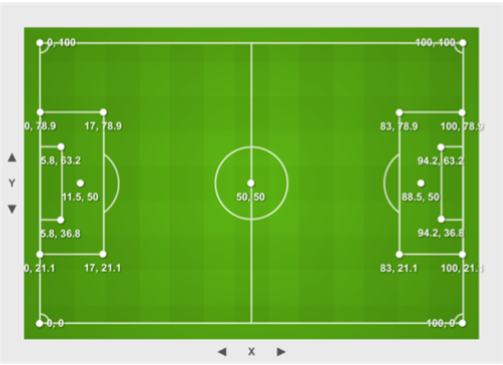

Bon, c'est beau mais ça nous dis rien sur le sens. Est-ce que l'origine est du coté de l'equipe en question ou est-ce que ça reste le même repère pour les deux équipes (et dans ce cas on sait pas trop le sens).

Réponse: This is based on the direction of attack always being from left to right on the x-axis, regardless of the team or period of the game, the defending goal line is always where x=0 and the attacking where x=100. All measurements for events given in the feed should therefore be taken in relation to percentages.

In [ ]:
track = sql_request("SELECT * FROM tracking ;") #attention c'est un peu long

In [4]:
track.shape #on comprend pourquoi

(32106, 15)

On étudie la variable time

In [5]:
max(track["time"]) # en seconde

3012.0

In [25]:
len(track["match"].unique()) # askip il y a 5 matchs

5

On comprend clairement que la variable temps est en seconde, la mi-temps la plus longue était de 50min. Bon je crois qu'on le savait déjà mais c'est vérifié.

In [12]:
track["name"].unique() # pas de ballon

array(['Player_0059', 'Player_0049', 'Player_0016', 'Player_0077',
       'Player_0064', 'Player_0017', 'Player_0042', 'Player_0060',
       'Player_0008', 'Player_0034', 'Player_0050', 'Player_0061',
       'Player_0043', 'Player_0021', 'Player_0039', 'Player_0052',
       'Player_0044', 'Player_0007', 'Player_0063', 'Player_0080',
       'Player_0024', 'Player_0081', 'Player_0015', 'Player_0076',
       'Player_0069', 'Player_0068', 'Player_0027', 'Player_0067',
       'Player_0019', 'Player_0035', 'Player_0041', 'Player_0030',
       'Player_0071', 'Player_0066', 'Player_0048', 'Player_0078',
       'Player_0013', 'Player_0058', 'Player_0065', 'Player_0012',
       'Player_0026', 'Player_0074', 'Player_0051', 'Player_0072',
       'Player_0006', 'Player_0070', 'Player_0005', 'Player_0055',
       'Player_0032', 'Player_0025', 'Player_0053', 'Player_0022',
       'Player_0057', 'Player_0075', 'Player_0038', 'Player_0056',
       'Player_0028', 'Player_0001', 'Player_0054', 'Player_00

In [3]:
track_joueur59 = sql_request("SELECT * FROM tracking LIMIT 55192;")
track_joueur59

time           ht  posx  posy         name     team      date  \
0         0.0   First Half   871   909  Player_0059  Team_03  Date_001   
1         0.1   First Half   861   909  Player_0059  Team_03  Date_001   
2         0.2   First Half   852   910  Player_0059  Team_03  Date_001   
3         0.3   First Half   842   911  Player_0059  Team_03  Date_001   
4         0.4   First Half   833   913  Player_0059  Team_03  Date_001   
5         0.5   First Half   823   916  Player_0059  Team_03  Date_001   
6         0.6   First Half   814   919  Player_0059  Team_03  Date_001   
7         0.7   First Half   805   922  Player_0059  Team_03  Date_001   
8         0.8   First Half   796   926  Player_0059  Team_03  Date_001   
9         0.9   First Half   787   930  Player_0059  Team_03  Date_001   
10        1.0   First Half   778   934  Player_0059  Team_03  Date_001   
11        1.1   First Half   769   938  Player_0059  Team_03  Date_001   
12        1.2   First Half   760   942  Player_0059  Team_03  Date_001   
13        1.3   First Half   751   947  Player_0059  Team_03  Date_001   
14        1.4   First Half   742   952  Player_0059  Team_03  Date_001   
15        1.5   First Half   733   956  Player_0059  Team_03  Date_001   
16        1.6   First Half   724   961  Player_0059  Team_03  Date_001   
17        1.7   First Half   715   966  Player_0059  Team_03  Date_001   
18        1.8   First Half   706   971  Player_0059  Team_03  Date_001   
19        1.9   First Half   697   975  Player_0059  Team_03  Date_001   
20        2.0   First Half   687   979  Player_0059  Team_03  Date_001   
21        2.1   First Half   678   982  Player_0059  Team_03  Date_001   
22        2.2   First Half   669   984  Player_0059  Team_03  Date_001   
23        2.3   First Half   659   984  Player_0059  Team_03  Date_001   
24        2.4   First Half   648   983  Player_0059  Team_03  Date_001   
25        2.5   First Half   638   979  Player_0059  Team_03  Date_001   
26        2.6   First Half   627   974  Player_0059  Team_03  Date_001   
27        2.7   First Half   616   965  Player_0059  Team_03  Date_001   
28        2.8   First Half   604   955  Player_0059  Team_03  Date_001   
29        2.9   First Half   592   942  Player_0059  Team_03  Date_001   
...       ...          ...   ...   ...          ...      ...       ...   
55162  2814.1  Second Half  -595   146  Player_0059  Team_03  Date_001   
55163  2814.2  Second Half  -585   164  Player_0059  Team_03  Date_001   
55164  2814.3  Second Half  -574   182  Player_0059  Team_03  Date_001   
55165  2814.4  Second Half  -564   198  Player_0059  Team_03  Date_001   
55166  2814.5  Second Half  -554   214  Player_0059  Team_03  Date_001   
55167  2814.6  Second Half  -543   229  Player_0059  Team_03  Date_001   
55168  2814.7  Second Half  -534   243  Player_0059  Team_03  Date_001   
55169  2814.8  Second Half  -524   257  Player_0059  Team_03  Date_001   
55170  2814.9  Second Half  -514   271  Player_0059  Team_03  Date_001   
55171  2815.0  Second Half  -505   284  Player_0059  Team_03  Date_001   
55172  2815.1  Second Half  -496   297  Player_0059  Team_03  Date_001   
55173  2815.2  Second Half  -487   309  Player_0059  Team_03  Date_001   
55174  2815.3  Second Half  -478   322  Player_0059  Team_03  Date_001   
55175  2815.4  Second Half  -469   333  Player_0059  Team_03  Date_001   
55176  2815.5  Second Half  -460   345  Player_0059  Team_03  Date_001   
55177  2815.6  Second Half  -451   357  Player_0059  Team_03  Date_001   
55178  2815.7  Second Half  -442   368  Player_0059  Team_03  Date_001   
55179  2815.8  Second Half  -434   379  Player_0059  Team_03  Date_001   
55180  2815.9  Second Half  -425   391  Player_0059  Team_03  Date_001   
55181  2816.0  Second Half  -417   402  Player_0059  Team_03  Date_001   
55182  2816.1  Second Half  -409   413  Player_0059  Team_03  Date_001   
55183  2816.2  Second Half  -401   424  Player_0059  Team_03  Date_001   
55184  2816.3

In [4]:
import matplotlib.pyplot as plt

In [7]:
pos_play59 = track_joueur59.iloc[:,2:4]

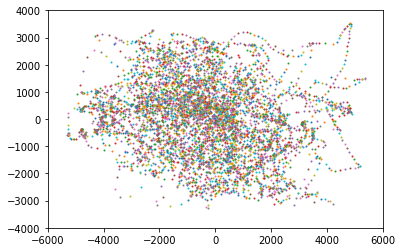

In [157]:
i=0
while i < 55191:
    plt.scatter(pos_play59.iloc[i,0] , pos_play59.iloc[i,1], s=1)
    plt.xlim(-6000,6000)
    plt.ylim(-4000,4000)
    i = i+10

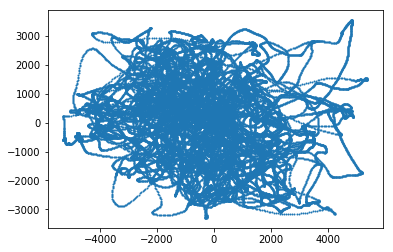

In [8]:
plt.scatter(pos_play59.iloc[:,0] , pos_play59.iloc[:,1], s=1)

In [5]:
Match_001 = sql_request("SELECT * FROM tracking WHERE match_id = 'Match_001';")

SELECT * FROM tracking WHERE match_id = 'Match_001';


TypeError: unhashable type: 'slice'